<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image



Saving 0232A118-EF98-410D-B996-6A0769F9712F.png to 0232A118-EF98-410D-B996-6A0769F9712F.png


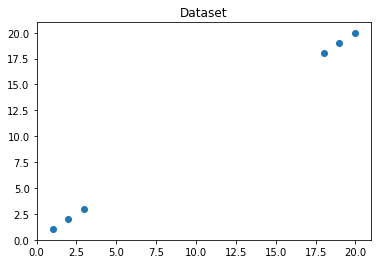

In [ ]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [ ]:
print('For ONE Cluster, all data points should be assigned to 1 Cluster\n')

kmeans = KMeans(n_clusters = 1, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For ONE Cluster, all data points should be assigned to 1 Cluster

Clusters assigned to each datapoints :
0    0
1    0
2    0
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 875.0


In [ ]:
print('For TWO Cluster, all data points should be assigned to 2 Clusters\n')

kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For TWO Cluster, all data points should be assigned to 2 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 8.0


In [ ]:
print('For THREE Cluster, all data points should be assigned to 3 Clusters\n')

kmeans = KMeans(n_clusters = 3, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For THREE Cluster, all data points should be assigned to 3 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    2
5    2
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 5.0


WCSS Formula

In K Means, Distance measure is Euclidean Distance Metric


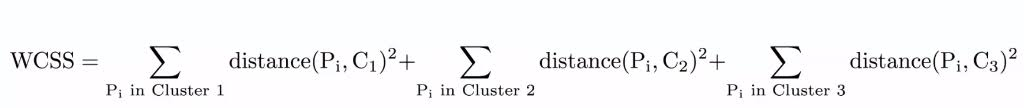

In [ ]:
print('WCSS Formula\n')
print('In K Means, Distance measure is Euclidean Distance Metric')
Image('C7423E3E-0827-4D5A-9AF4-85291A8637ED.jpeg')

For cluster = 1, SSE/WCSS is 875.0
For cluster = 2, SSE/WCSS is 8.0
For cluster = 3, SSE/WCSS is 5.0
For cluster = 4, SSE/WCSS is 2.0
For cluster = 5, SSE/WCSS is 1.0


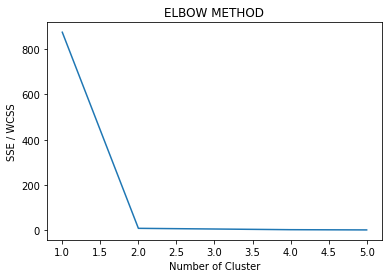

Optimum Number of Cluster : 2


In [ ]:
# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = pd.DataFrame({'x':x_axis, 'y':y_axis})

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

print('Optimum Number of Cluster : 2')

#### **Silhouette Score**
- It refers to a method of interpretation and validation of consistency within clusters of data.
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Silhouette Score Example



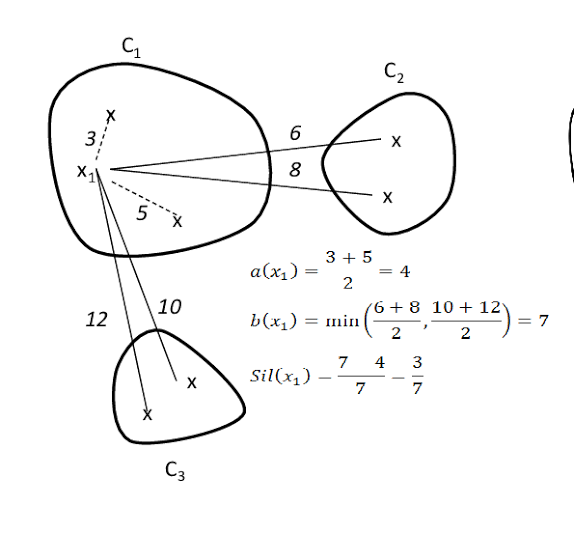

In [ ]:
print('Silhouette Score Example\n')
Image('F936FB3C-5CD7-4269-93BB-A4C2CEFB75B0.png',height = 300)

In [ ]:
# Silhouette Score

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

for n_clusters in range(0,6):# Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters,sil_coeff))

print('\n It is same for every cluster, so choose from Elbow Method')

For cluster= 0, Silhouette Coefficient is 0.08333333333333333
For cluster= 1, Silhouette Coefficient is 0.08333333333333333
For cluster= 2, Silhouette Coefficient is 0.08333333333333333
For cluster= 3, Silhouette Coefficient is 0.08333333333333333
For cluster= 4, Silhouette Coefficient is 0.08333333333333333
For cluster= 5, Silhouette Coefficient is 0.08333333333333333

 It is same for every cluster, so choose from Elbow Method
